In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
diamonds = pd.read_csv('./kickoff/diamonds.csv').reset_index(drop=True)
ricks_diamonds = pd.read_csv('./kickoff/rick_diamonds.csv').reset_index(drop=True)

# Inspecting correlations

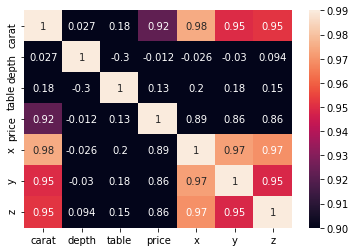

In [3]:
corr = diamonds.corr()
sns.heatmap(corr, vmin=0.9, vmax=0.99, annot=True)

# The Four C's

Colors: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Cuts: ['Premium' 'Good' 'Very Good' 'Ideal' 'Fair']
Clarity:['SI1' 'VS1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'I1' 'IF']


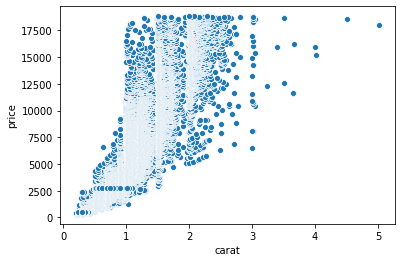

In [4]:
sns.scatterplot(diamonds.carat, diamonds.price)
dcolors=diamonds.color.unique() # J, I, H, G, F, E, D
dcuts=diamonds.cut.unique() # Fair, Good, Very Good, Premium, Ideal
dclarity=diamonds.clarity.unique() # I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

print(f'Colors: {dcolors}\nCuts: {dcuts}\nClarity:{dclarity}')

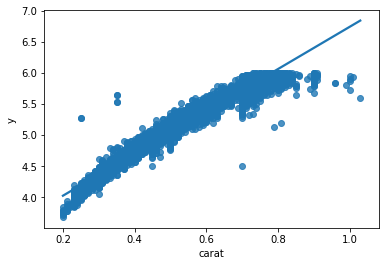

In [14]:
sns.regplot('carat', 'price', data=diamonds)

# Carat composition

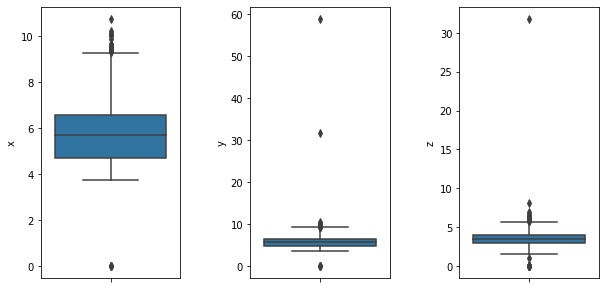

In [6]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))
sns.boxplot(y=diamonds.x, ax=ax[0])
sns.boxplot(y=diamonds.y, ax=ax[1])
sns.boxplot(y=diamonds.z, ax=ax[2])
plt.subplots_adjust(wspace=0.5)

> I decided, as a time management decision, to drop rows with values equal to zero and greater than 10. Originally, my parameter for droping was for rows == 0 or > 30. But I noticed that decreasing the interval, would also decrease my RMSE. However, my Score would decrease as well.

In [7]:
diamonds.drop(diamonds.query('x>6').index, inplace=True)
diamonds.drop(diamonds.query('y>6').index, inplace=True)
diamonds.drop(diamonds.query('z>6').index, inplace=True)

diamonds.drop(diamonds.query('x<2').index, inplace=True)
diamonds.drop(diamonds.query('y<2').index, inplace=True)
diamonds.drop(diamonds.query('z<2').index, inplace=True)

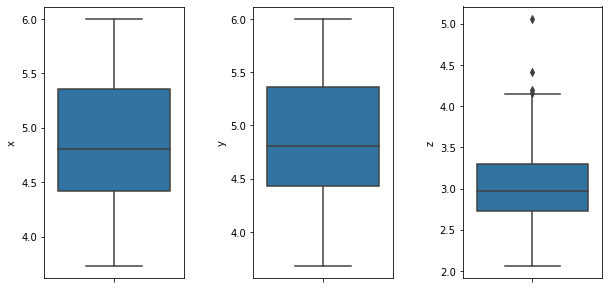

In [8]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))
sns.boxplot(y=diamonds.x, ax=ax[0])
sns.boxplot(y=diamonds.y, ax=ax[1])
sns.boxplot(y=diamonds.z, ax=ax[2])
plt.subplots_adjust(wspace=0.5)

# Linear regression

In [9]:
ricks_diamonds_dummified = pd.get_dummies(ricks_diamonds)
dummies = pd.get_dummies(diamonds)

model = LinearRegression()
X = dummies[['carat', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
y = dummies['price']
model.fit(X,y)

data_to_predict = ricks_diamonds_dummified[['carat', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
price_predicted = model.predict(data_to_predict)

y_pred = pd.Series(model.predict(X))
y_obs = dummies['price']

rmse = np.sqrt(mean_squared_error(y_obs, y_pred).astype(int))
score = model.score(X, y)

print(f'RMSE: {rmse}\nSCORE: {score}')

# RMSE: 1152.7753467176508
# SCORE: 0.9164978293433101

# MAX VALUES around 10
# RMSE: 1145.3863976842051
# SCORE: 0.9174843189638084

RMSE: 255.84565659787933
SCORE: 0.9112374955880674


# Checking correlations again

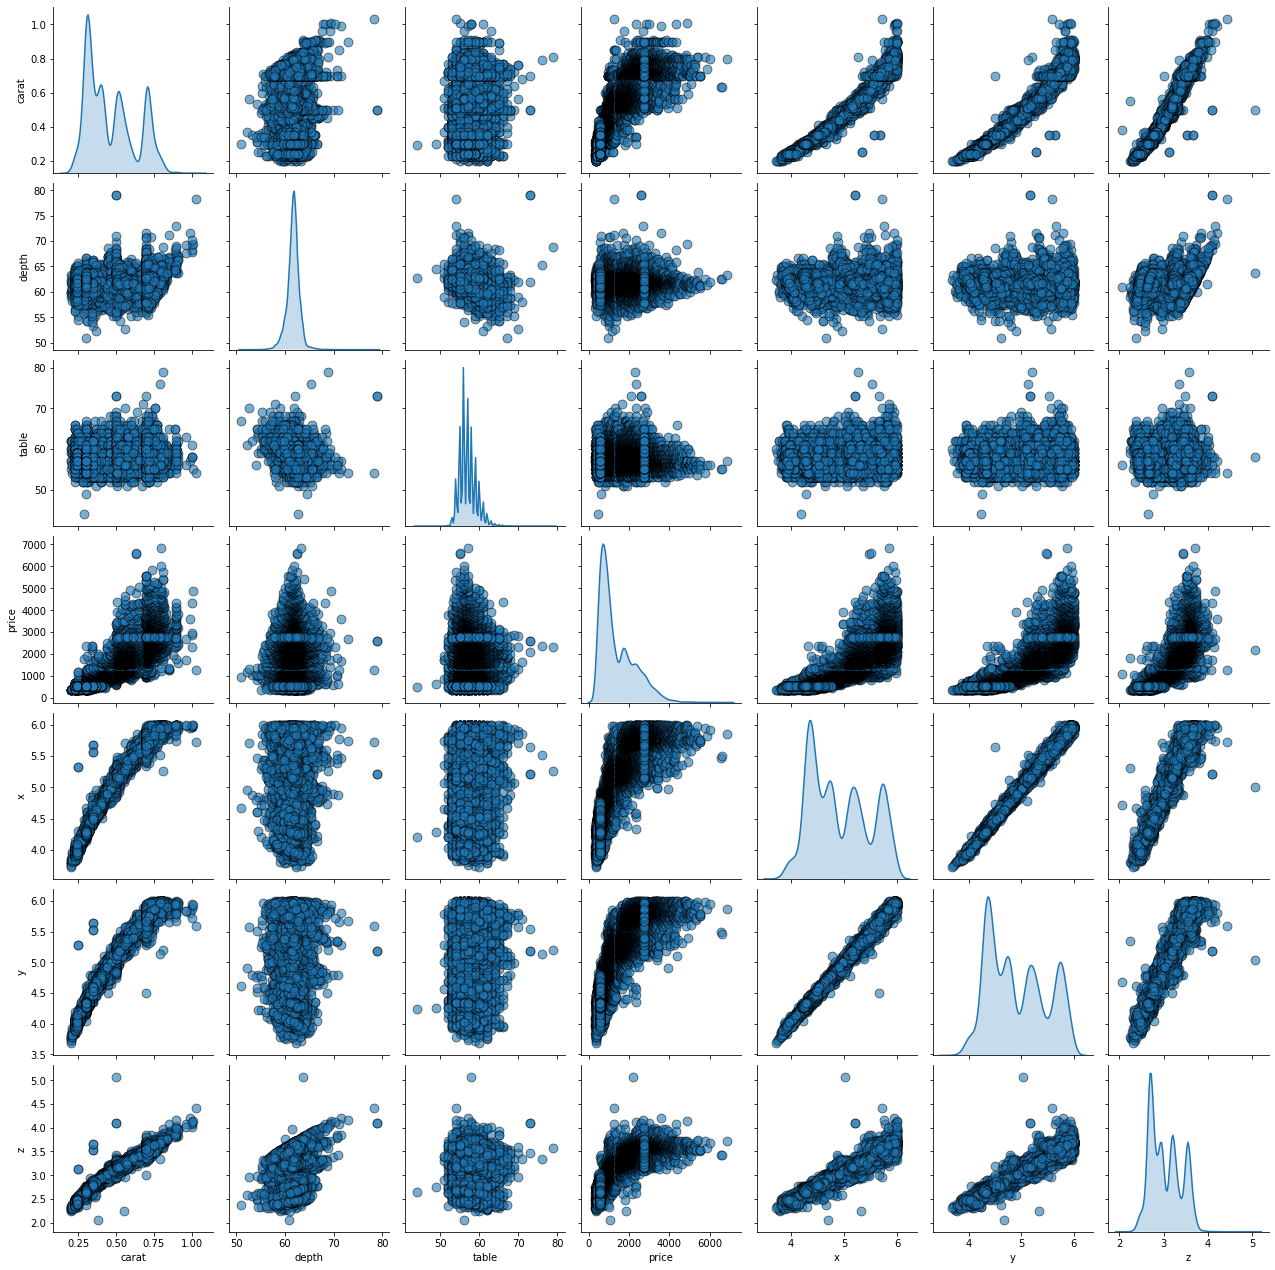

In [17]:
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

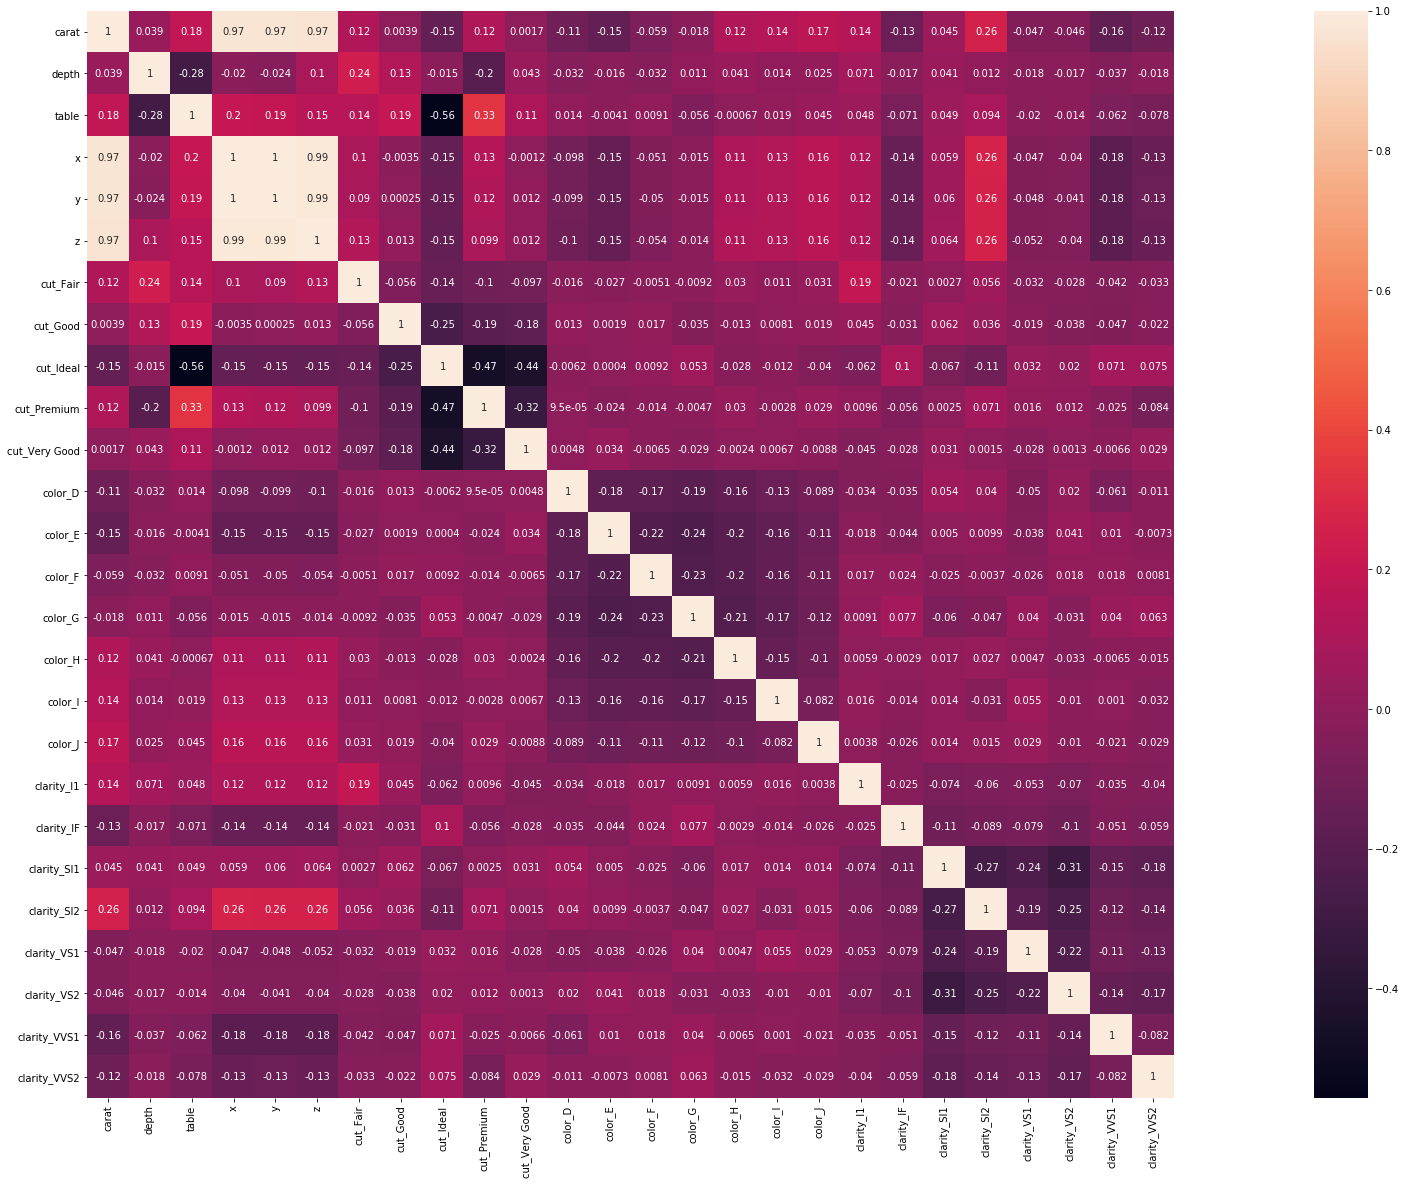

In [10]:
plt.figure(figsize=(50,20))
sns.heatmap(ricks_diamonds_dummified.corr(), annot=True, square=True)

# Creating column

In [11]:
ricks_diamonds['price_predicted'] = price_predicted.astype(int)
ricks_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3102
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,866
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1542
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,4838
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,10560
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,220
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,1942
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,4058
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,970


# Exporting .csv

In [12]:
ricks_diamonds.to_csv('./ricks_diamonds.csv')